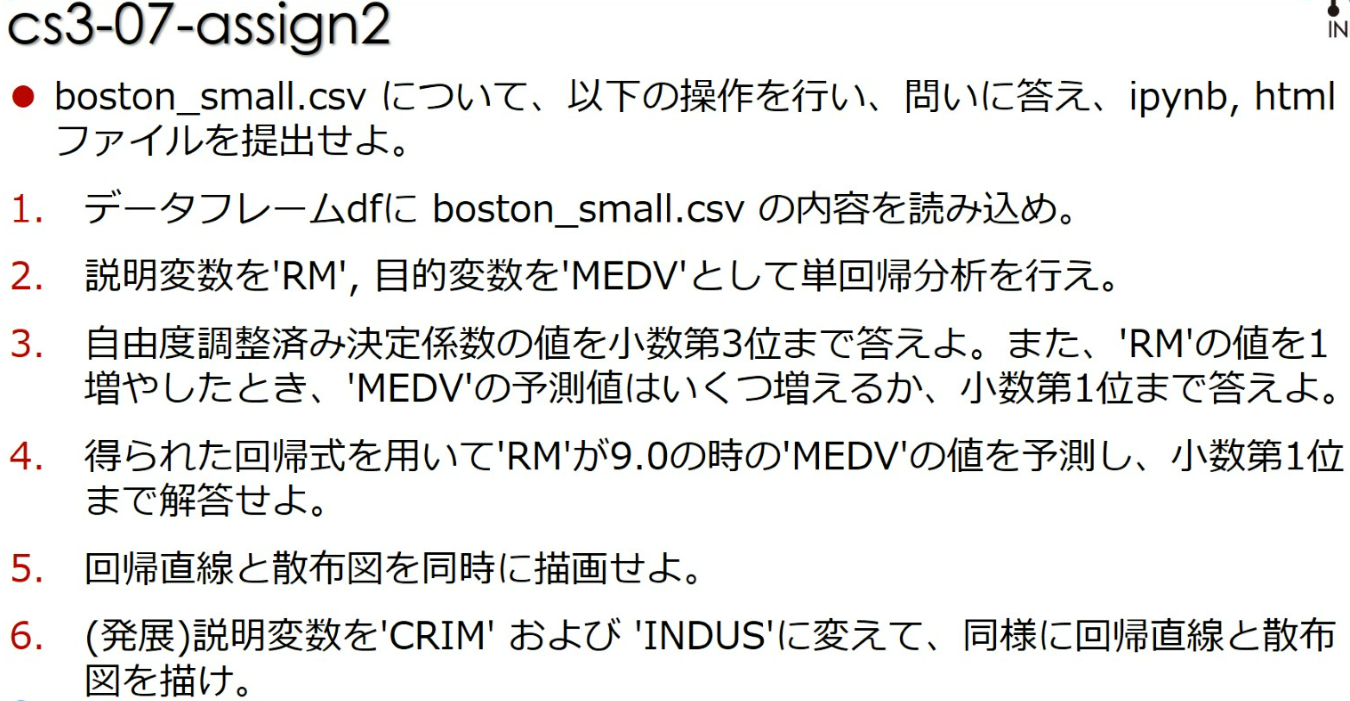

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
csv_in = 'boston_small.csv'
df = pd.read_csv(csv_in, sep=',', skiprows=8, header=0)
print(df.shape)
print(df.info())
display(df.head())

(300, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    300 non-null    float64
 1   INDUS   300 non-null    float64
 2   RM      300 non-null    float64
 3   MEDV    300 non-null    float64
dtypes: float64(4)
memory usage: 9.5 KB
None


,CRIM,INDUS,RM,MEDV
0,0.00632,2.31,6.575,24.0
1,0.02731,7.07,6.421,21.6
2,0.02729,7.07,7.185,34.7
3,0.03237,2.18,6.998,33.4
4,0.06905,2.18,7.147,36.2


In [3]:
X = df[ ['RM'] ]  
y = df[ 'MEDV' ]  
print('X:', X.shape)
display(X.head())
print('y:', y.shape)
print(y.head())

X: (300, 1)


,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


y: (300,)
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [4]:
X_c = sm.add_constant(X)
display(X.head())
display(X_c.head())

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [5]:
model = sm.OLS(y, X_c)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1242.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):          2.71e-108
Time:                        00:44:24   Log-Likelihood:                -834.22
No. Observations:                 300   AIC:                             1672.
Df Residuals:                     298   BIC:                             1680.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -47.0934      2.072    -22.730      0.0

In [6]:
print('R2:', results.rsquared)
print('Adj R2:', results.rsquared_adj)

R2: 0.8064806004546003
Adj R2: 0.8058312064963943


In [7]:
print(results.params)

const   -47.093397
RM       11.304407
dtype: float64


In [8]:
a0 = results.params['const']
a1 = results.params['RM']
x_min = X['RM'].min()
x_max = X['RM'].max()
x_min_max = np.array([x_min, x_max])
y_min_max = a0 + a1 * x_min_max

In [9]:
x_test = np.array([ 9.0 ])
y_test = a0 + a1 * x_test
print(y_test)

[54.64626979]


In [10]:
x_test_c = sm.add_constant(x_test, has_constant='add')
y_test = results.predict(x_test_c)
print(y_test)

[54.64626979]


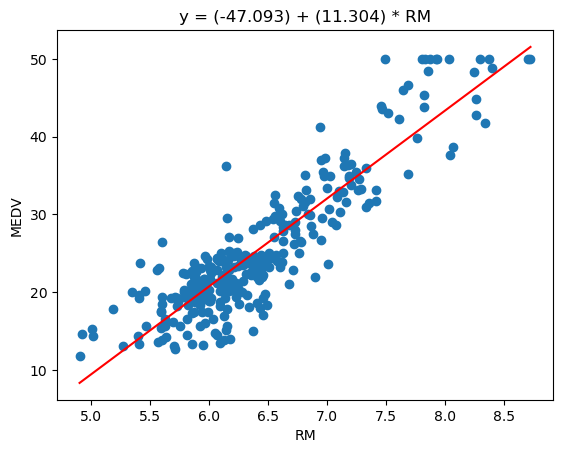

In [11]:
plt.title('y = ({:.3f}) + ({:.3f}) * RM'.format(a0, a1))
plt.scatter(X['RM'], y)
plt.plot(x_min_max, y_min_max, c='red')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     13.94
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           0.000226
Time:                        00:45:31   Log-Likelihood:                -1073.7
No. Observations:                 300   AIC:                             2151.
Df Residuals:                     298   BIC:                             2159.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.7050      0.599     44.559      0.0

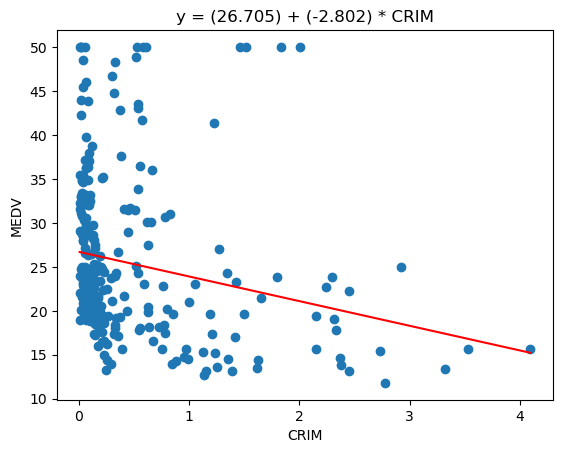

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     55.38
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.07e-12
Time:                        00:45:31   Log-Likelihood:                -1055.0
No. Observations:                 300   AIC:                             2114.
Df Residuals:                     298   BIC:                             2121.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.3788      0.810     37.527      0.0

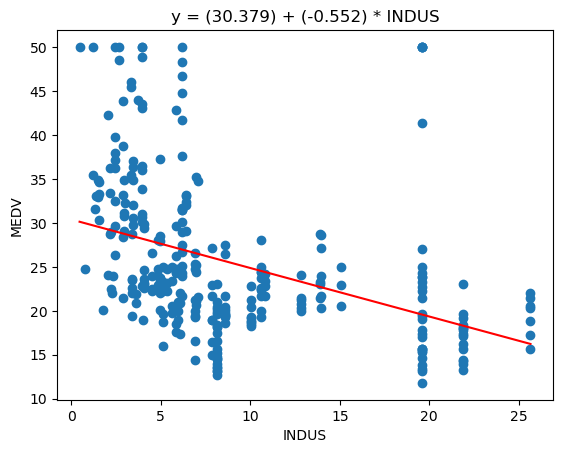

In [12]:
for obj in ['CRIM', 'INDUS']:
    X = df[ [obj] ]  # explanatory variable, 2D
    y = df[ 'MEDV' ]  # objective variable, 1D

    X_c = sm.add_constant(X)
    model = sm.OLS(y, X_c)
    results = model.fit()
    print(results.summary())
    
    
    a0 = results.params['const']
    a1 = results.params[obj]
    x_min = X[obj].min()
    x_max = X[obj].max()
    x_min_max = np.array([x_min, x_max])
    y_min_max = a0 + a1 * x_min_max
    
    plt.title('y = ({:.3f}) + ({:.3f}) * {}'.format(a0, a1, obj))
    plt.scatter(X[obj], y)
    plt.plot(x_min_max, y_min_max, c='red')
    plt.xlabel(obj)
    plt.ylabel('MEDV')
    plt.show()